In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
from scipy.stats import ttest_ind, ttest_ind_from_stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dir_path = os.path.join(os.path.sep,'Users', 'qianwu', 'Documents', 'GitHub', 'gender_paper')
milk_brain_data_path = os.path.join(dir_path, 'milk_data', 'milk_brain.xlsx')

milk_brain = pd.read_excel(milk_brain_data_path)

In [3]:
female_filter = milk_brain['sex']=='Female'
male_filter = milk_brain['sex']=='Male'

In [4]:
pricef_filter_col = [col for col in milk_brain if col.endswith('pf')]
techf_filter_col = [col for col in milk_brain if col.endswith('tf')]
combof_filter_col = [col for col in milk_brain if col.endswith('cf')]

price_filter_col = [col for col in milk_brain if col.endswith('p')]
tech_filter_col = [col for col in milk_brain if col.endswith('t')]
combo_filter_col = [col for col in milk_brain if col.endswith('c')]

In [5]:
pricef_filter_col = pricef_filter_col[1:]
techf_filter_col = techf_filter_col[1:]
combof_filter_col = combof_filter_col[4:]

price_filter_col = price_filter_col[1:12]
tech_filter_col = tech_filter_col[2:13]
combo_filter_col = combo_filter_col[2:13]

In [6]:
female_price = milk_brain[pricef_filter_col][female_filter]
female_tech = milk_brain[techf_filter_col][female_filter]
female_combo = milk_brain[combof_filter_col][female_filter]

male_price = milk_brain[pricef_filter_col][male_filter]
male_tech = milk_brain[techf_filter_col][male_filter]
male_combo = milk_brain[combof_filter_col][male_filter]

### Price Experiment Female Brain ROI Correlations

In [7]:
female_price.corr()

,lvspf,rvspf,linspf,rinspf,vmpfcpf,ldmpfcpf,lthalpf,rthalpf,pccpf,ramygdpf,rdlpfcpf
lvspf,1.000000,0.076763,0.287966,0.078643,-0.035019,0.168272,0.383387,0.269686,0.190723,0.036253,0.007042
rvspf,0.076763,1.000000,0.138090,0.091202,-0.043453,-0.040941,0.275152,0.276417,-0.093790,0.194452,-0.286038
linspf,0.287966,0.138090,1.000000,0.648353,-0.337379,0.346714,0.265313,0.405491,0.185299,0.385837,0.208812
rinspf,0.078643,0.091202,0.648353,1.000000,0.057575,0.051239,0.233519,0.398656,0.461296,0.713468,0.474069
vmpfcpf,-0.035019,-0.043453,-0.337379,0.057575,1.000000,-0.097661,0.215838,0.104612,0.385985,-0.031453,-0.036117
ldmpfcpf,0.168272,-0.040941,0.346714,0.051239,-0.097661,1.000000,0.286510,0.326888,-0.046928,-0.008964,-0.001512
lthalpf,0.383387,0.275152,0.265313,0.233519,0.215838,0.286510,1.000000,0.810616,0.516510,0.317028,0.266591
rthalpf,0.269686,0.276417,0.405491,0.398656,0.104612,0.326888,0.810616,1.000000,0.499513,0.295763,0.367308
pccpf,0.190723,-0.093790,0.185299,0.461296,0.385985,-0.046928,0.516510,0.499513,1.000000,0.454377,0.304284
ramygdpf,0.036253,0.194452,0.385837,0.713468,-0.031453,-0.008964,0.317028,0.295763,0.454377,1.000000,0.165171


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


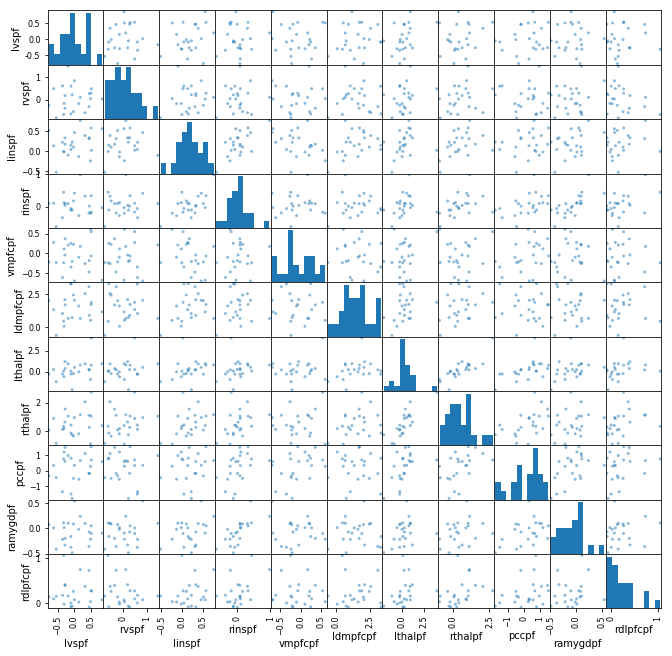

In [8]:
pd.scatter_matrix(female_price, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

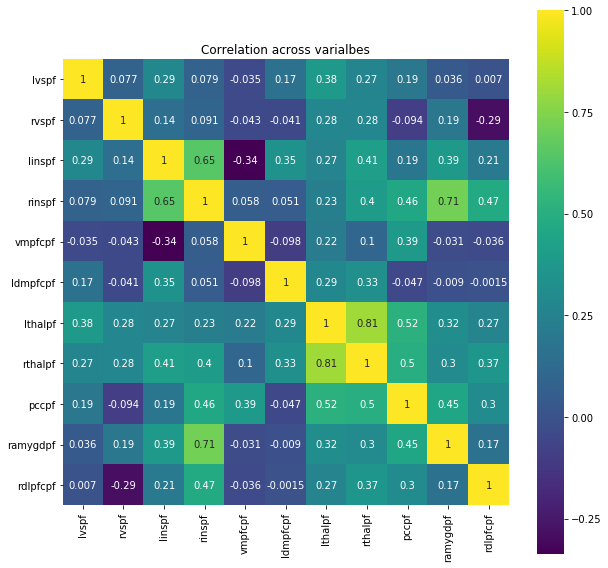

In [9]:
correlation = female_price.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Price Experiment Male Brain ROI Correlations

In [10]:
male_tech.corr()

,lvstf,rvstf,linstf,rinstf,vmpfctf,ldmpfctf,lthaltf,rthaltf,pcctf,ramygdtf,rdlpfctf
lvstf,1.000000,0.413044,0.099605,0.235978,0.434580,0.031547,-0.003313,0.047734,0.259949,0.464786,0.083452
rvstf,0.413044,1.000000,0.421985,0.338539,0.649186,0.263150,0.668843,0.647053,0.446409,0.721242,0.310251
linstf,0.099605,0.421985,1.000000,0.768307,0.363737,0.056140,0.558773,0.381491,0.518190,0.626857,0.064950
rinstf,0.235978,0.338539,0.768307,1.000000,0.538169,0.087180,0.443045,0.314006,0.432931,0.596283,0.265457
vmpfctf,0.434580,0.649186,0.363737,0.538169,1.000000,0.019179,0.320977,0.319888,0.336771,0.654555,0.558889
ldmpfctf,0.031547,0.263150,0.056140,0.087180,0.019179,1.000000,0.221903,0.222046,0.216022,0.036599,0.154763
lthaltf,-0.003313,0.668843,0.558773,0.443045,0.320977,0.221903,1.000000,0.841417,0.609292,0.503838,0.305472
rthaltf,0.047734,0.647053,0.381491,0.314006,0.319888,0.222046,0.841417,1.000000,0.491145,0.383040,0.240063
pcctf,0.259949,0.446409,0.518190,0.432931,0.336771,0.216022,0.609292,0.491145,1.000000,0.370538,0.224148
ramygdtf,0.464786,0.721242,0.626857,0.596283,0.654555,0.036599,0.503838,0.383040,0.370538,1.000000,0.201982


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


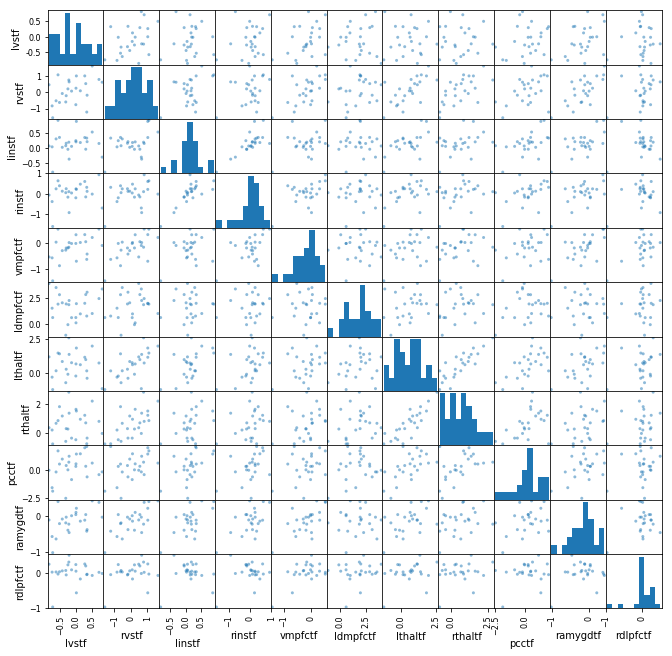

In [11]:
pd.scatter_matrix(male_tech, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

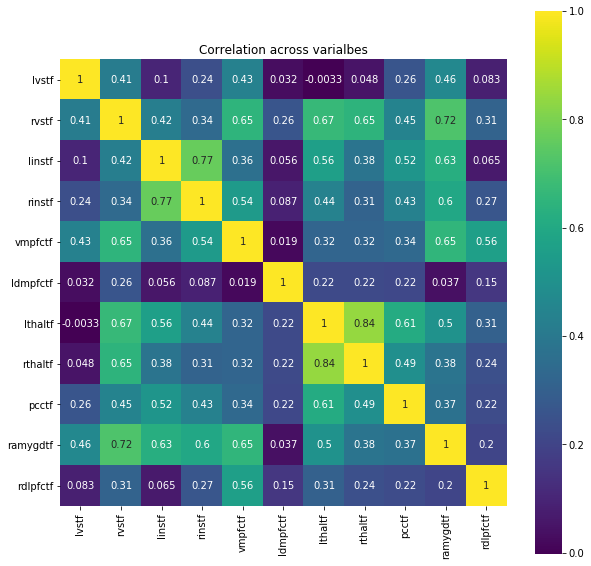

In [12]:
correlation = male_tech.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Tech Experiment Female Brain ROI Correlations

In [13]:
female_tech.corr()

,lvstf,rvstf,linstf,rinstf,vmpfctf,ldmpfctf,lthaltf,rthaltf,pcctf,ramygdtf,rdlpfctf
lvstf,1.000000,0.167952,0.396354,0.177409,-0.117934,0.060693,0.246582,0.195720,0.281342,0.051989,0.085628
rvstf,0.167952,1.000000,0.306813,0.339751,0.166946,0.156689,0.360172,0.384528,0.113796,0.420249,0.005293
linstf,0.396354,0.306813,1.000000,0.726376,-0.091439,0.568825,0.490825,0.656465,0.418783,0.460999,0.419072
rinstf,0.177409,0.339751,0.726376,1.000000,0.201440,0.306951,0.355194,0.567875,0.595857,0.709788,0.612887
vmpfctf,-0.117934,0.166946,-0.091439,0.201440,1.000000,-0.127993,0.178217,0.050645,0.099655,-0.069213,0.155968
ldmpfctf,0.060693,0.156689,0.568825,0.306951,-0.127993,1.000000,0.290259,0.443608,0.166835,0.236366,0.126476
lthaltf,0.246582,0.360172,0.490825,0.355194,0.178217,0.290259,1.000000,0.810254,0.346251,0.318612,0.232446
rthaltf,0.195720,0.384528,0.656465,0.567875,0.050645,0.443608,0.810254,1.000000,0.398335,0.429909,0.313113
pcctf,0.281342,0.113796,0.418783,0.595857,0.099655,0.166835,0.346251,0.398335,1.000000,0.500995,0.402208
ramygdtf,0.051989,0.420249,0.460999,0.709788,-0.069213,0.236366,0.318612,0.429909,0.500995,1.000000,0.282683


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


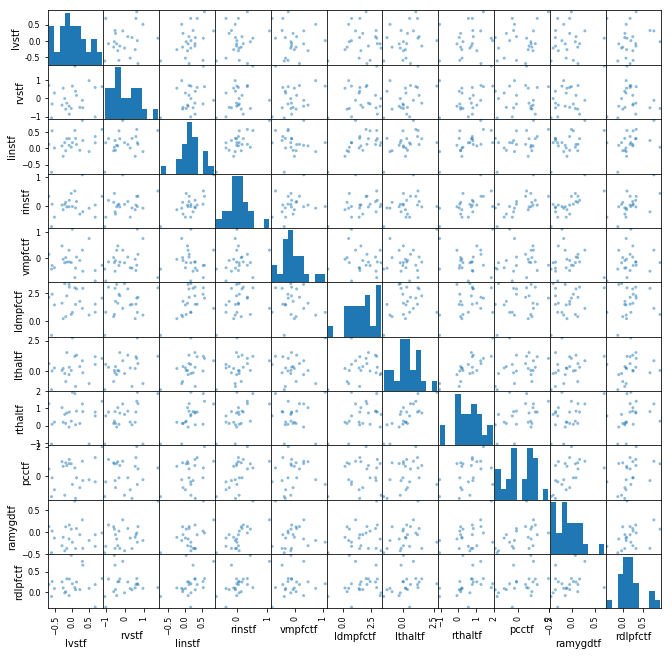

In [14]:
pd.scatter_matrix(female_tech, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

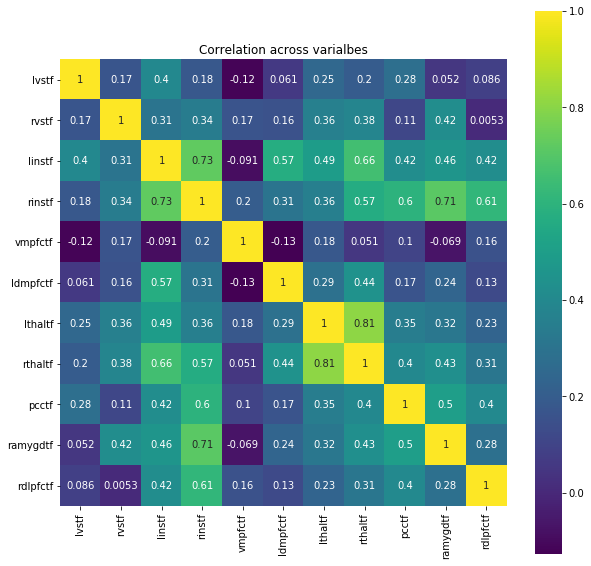

In [15]:
correlation = female_tech.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Tech Experiment Male Brain ROI Correlations

In [16]:
male_tech.corr()

,lvstf,rvstf,linstf,rinstf,vmpfctf,ldmpfctf,lthaltf,rthaltf,pcctf,ramygdtf,rdlpfctf
lvstf,1.000000,0.413044,0.099605,0.235978,0.434580,0.031547,-0.003313,0.047734,0.259949,0.464786,0.083452
rvstf,0.413044,1.000000,0.421985,0.338539,0.649186,0.263150,0.668843,0.647053,0.446409,0.721242,0.310251
linstf,0.099605,0.421985,1.000000,0.768307,0.363737,0.056140,0.558773,0.381491,0.518190,0.626857,0.064950
rinstf,0.235978,0.338539,0.768307,1.000000,0.538169,0.087180,0.443045,0.314006,0.432931,0.596283,0.265457
vmpfctf,0.434580,0.649186,0.363737,0.538169,1.000000,0.019179,0.320977,0.319888,0.336771,0.654555,0.558889
ldmpfctf,0.031547,0.263150,0.056140,0.087180,0.019179,1.000000,0.221903,0.222046,0.216022,0.036599,0.154763
lthaltf,-0.003313,0.668843,0.558773,0.443045,0.320977,0.221903,1.000000,0.841417,0.609292,0.503838,0.305472
rthaltf,0.047734,0.647053,0.381491,0.314006,0.319888,0.222046,0.841417,1.000000,0.491145,0.383040,0.240063
pcctf,0.259949,0.446409,0.518190,0.432931,0.336771,0.216022,0.609292,0.491145,1.000000,0.370538,0.224148
ramygdtf,0.464786,0.721242,0.626857,0.596283,0.654555,0.036599,0.503838,0.383040,0.370538,1.000000,0.201982


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


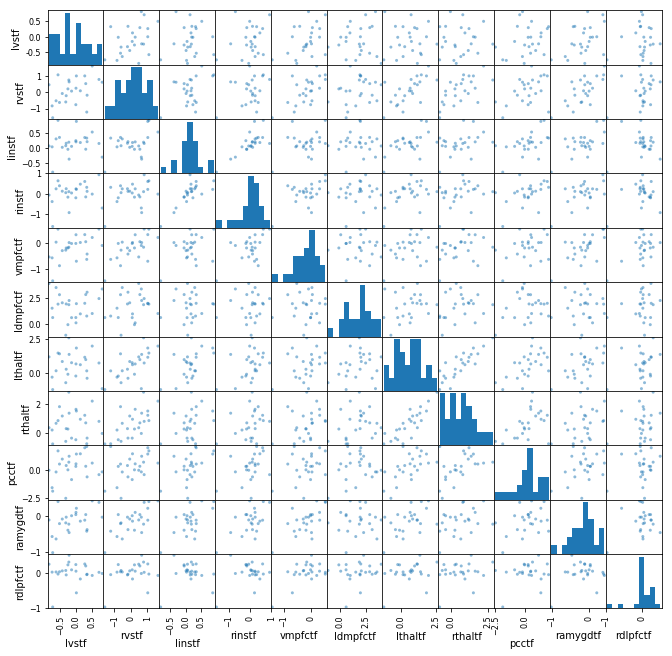

In [17]:
pd.scatter_matrix(male_tech, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

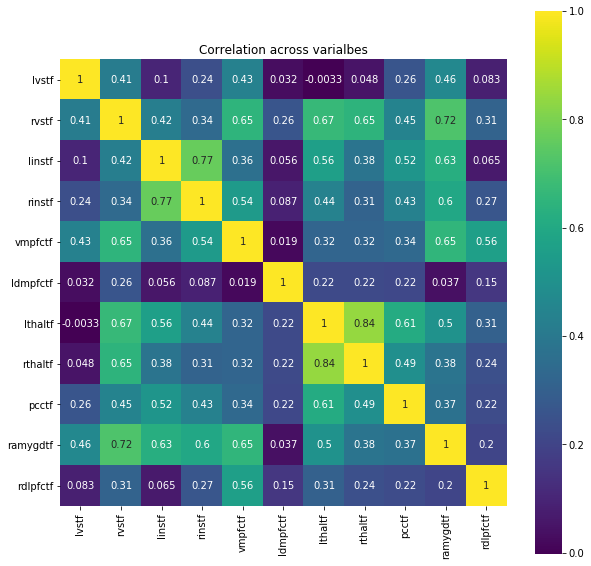

In [18]:
correlation = male_tech.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Combination Experiment Female Brain ROI Correlations

In [19]:
female_combo.corr()

,lvscf,rvscf,linscf,rinscf,vmpfccf,ldmpfccf,lthalcf,rthalcf,pcccf,ramygdcf,rdlpfccf
lvscf,1.000000,0.298269,0.281277,0.164664,0.139301,0.052939,-0.120358,-0.078721,0.203910,0.173973,0.125593
rvscf,0.298269,1.000000,0.175544,0.358806,0.161676,0.314847,0.131919,0.279151,0.187023,0.437083,-0.104410
linscf,0.281277,0.175544,1.000000,0.754839,-0.102361,0.548002,0.472626,0.545980,0.535727,0.302400,0.385368
rinscf,0.164664,0.358806,0.754839,1.000000,0.234922,0.329505,0.435940,0.561152,0.679311,0.592834,0.574272
vmpfccf,0.139301,0.161676,-0.102361,0.234922,1.000000,0.013788,0.043602,-0.001694,0.344961,0.079000,0.039256
ldmpfccf,0.052939,0.314847,0.548002,0.329505,0.013788,1.000000,0.364410,0.516838,0.232140,0.042960,0.074375
lthalcf,-0.120358,0.131919,0.472626,0.435940,0.043602,0.364410,1.000000,0.835712,0.527255,0.176404,0.234816
rthalcf,-0.078721,0.279151,0.545980,0.561152,-0.001694,0.516838,0.835712,1.000000,0.512002,0.279725,0.329171
pcccf,0.203910,0.187023,0.535727,0.679311,0.344961,0.232140,0.527255,0.512002,1.000000,0.465661,0.406451
ramygdcf,0.173973,0.437083,0.302400,0.592834,0.079000,0.042960,0.176404,0.279725,0.465661,1.000000,0.178836


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


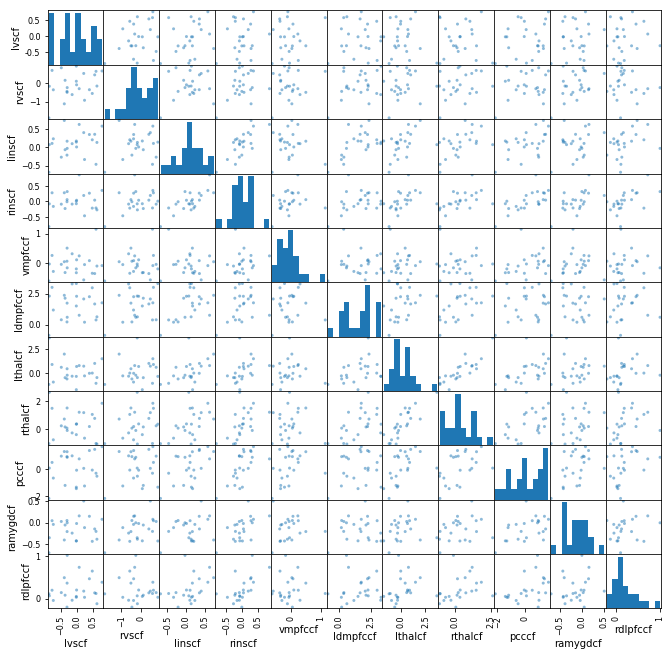

In [20]:
pd.scatter_matrix(female_combo, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

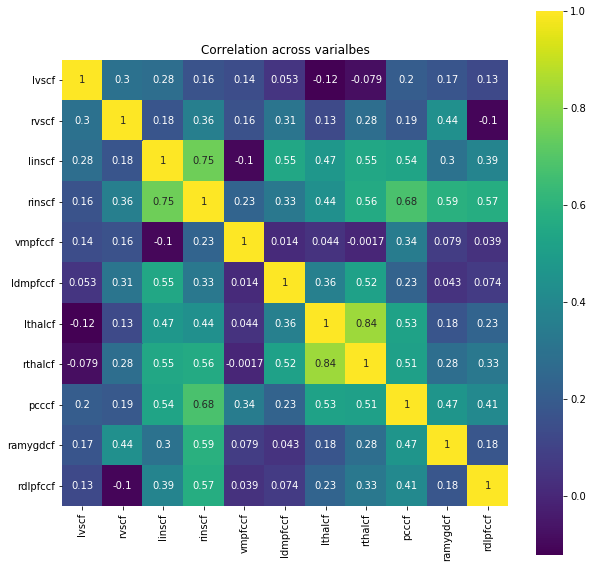

In [21]:
correlation = female_combo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')

### Combination Experiment Male Brain ROI Correlations

In [22]:
male_combo.corr()

,lvscf,rvscf,linscf,rinscf,vmpfccf,ldmpfccf,lthalcf,rthalcf,pcccf,ramygdcf,rdlpfccf
lvscf,1.000000,0.408178,0.269217,0.384239,0.239998,0.147338,0.101305,0.063080,0.379725,0.536054,0.169354
rvscf,0.408178,1.000000,0.422448,0.421615,0.656955,0.289600,0.651078,0.580931,0.438871,0.649722,0.598388
linscf,0.269217,0.422448,1.000000,0.785407,0.417054,0.000330,0.545236,0.415716,0.353653,0.617100,0.286453
rinscf,0.384239,0.421615,0.785407,1.000000,0.475662,0.117624,0.511495,0.365077,0.345980,0.657762,0.413635
vmpfccf,0.239998,0.656955,0.417054,0.475662,1.000000,0.189817,0.350662,0.232721,0.197047,0.619572,0.613330
ldmpfccf,0.147338,0.289600,0.000330,0.117624,0.189817,1.000000,0.222610,0.192504,0.267088,0.084123,0.203060
lthalcf,0.101305,0.651078,0.545236,0.511495,0.350662,0.222610,1.000000,0.888967,0.490049,0.526501,0.471590
rthalcf,0.063080,0.580931,0.415716,0.365077,0.232721,0.192504,0.888967,1.000000,0.417279,0.382787,0.376905
pcccf,0.379725,0.438871,0.353653,0.345980,0.197047,0.267088,0.490049,0.417279,1.000000,0.232380,0.275738
ramygdcf,0.536054,0.649722,0.617100,0.657762,0.619572,0.084123,0.526501,0.382787,0.232380,1.000000,0.349493


/Users/qianwu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


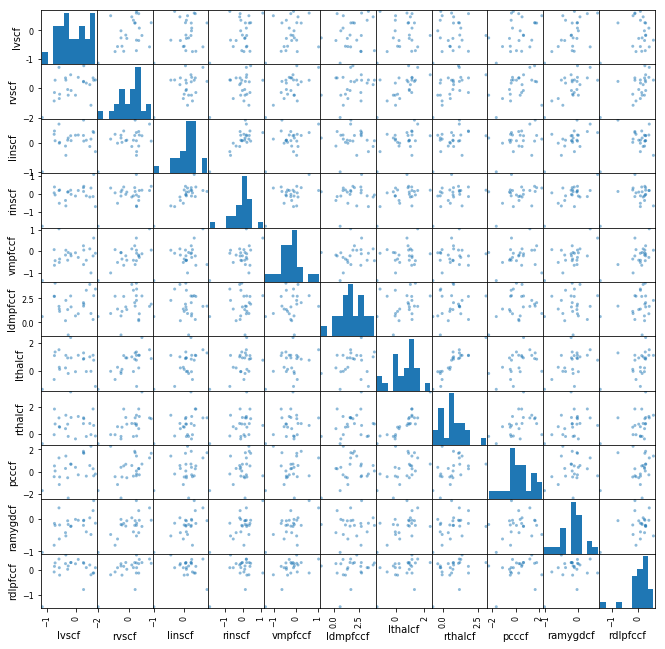

In [23]:
pd.scatter_matrix(male_combo, figsize=(11, 11))
plt.show()

Text(0.5,1,'Correlation across varialbes')

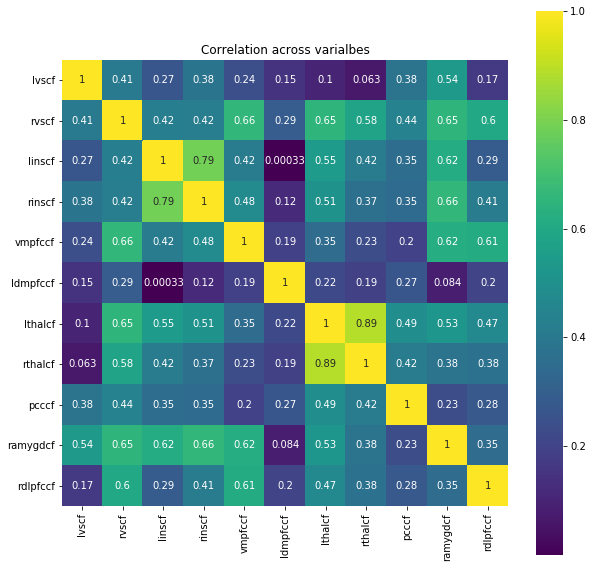

In [24]:
correlation = male_combo.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation across varialbes')